# What is AUC-ROC?
The AUC-ROC curve shows us how well our machine learning classifier is performing. It only works for binary classification problems.

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.
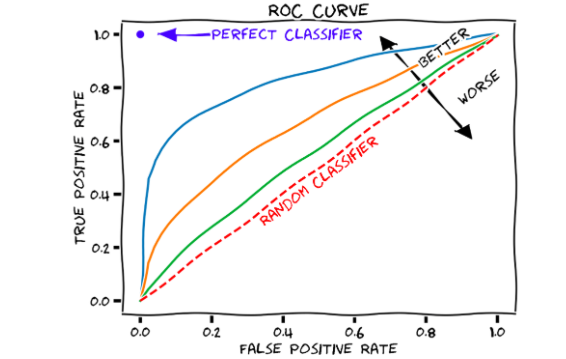

# How Does the AUC-ROC Curve Work?

Example 1: 
Red distribution curve is of the positive class (patients with disease) and the green distribution curve is of the negative class(patients with no disease).
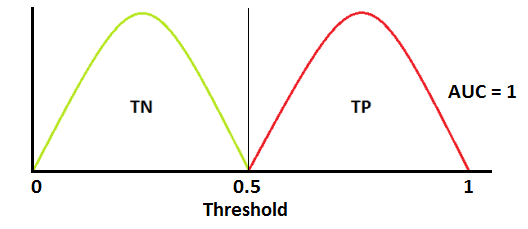
This is an ideal situation. When two curves don’t overlap at all means model has an ideal measure of separability. It is perfectly able to distinguish between positive class and negative class.

Example 2: 
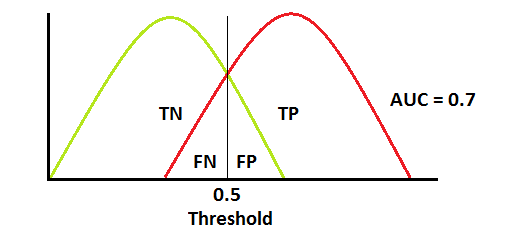
When two distributions overlap, we introduce type 1 and type 2 errors. Depending upon the threshold, we can minimize or maximize them. When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.

Example 3:
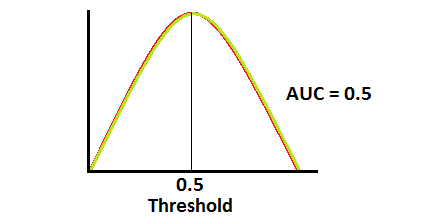
This is the worst situation. When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class.

Example 4: 
    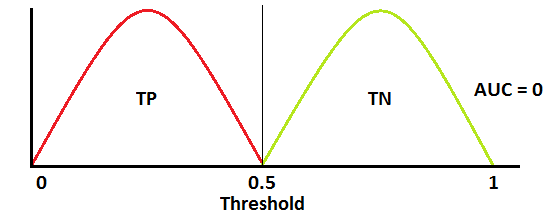
    When AUC is approximately 0, the model is actually reciprocating the classes. It means the model is predicting a negative class as a positive class and vice versa.

# ROC & AUC Explained with Python Examples

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
# matplotlib
import matplotlib.pyplot as plt

import warnings

In [29]:
# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

test the performance of two classifiers on this dataset:

In [30]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

using roc_curve() which computes the ROC for your classifier and  returns the FPR, TPR, and threshold values:

In [31]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

Computing AUC score using the roc_auc_score() method of sklearn:

In [32]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


plot the ROC curves for the two algorithms 

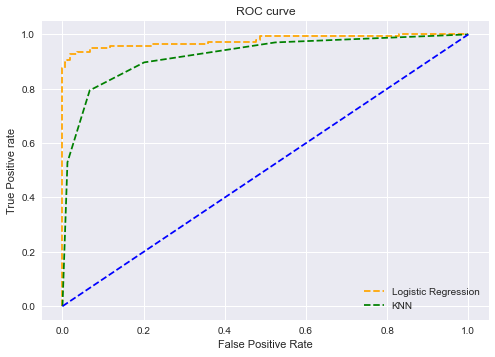

In [33]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#Interpretation
#blue dashed line represents the random guessing
#Yellow dashed line (LR) towards top left represents the best / perfect classifier
#Green dashed line (KNN) has different AUC value and related ROC curve.

# Employee Churn Classification Problem
Here, our target variable Y is the probability of an employee leaving the company.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

In [36]:
# Read Excel file
df_emp = pd.read_excel(
    'HR-data.xlsx', sheet_name=0)
print("Shape of dataframe is: {}".format(df_emp.shape))

Shape of dataframe is: (1470, 35)


In [39]:
# Make a copy of the original sourcefile
df_hr = df_emp.copy()

In [16]:
# Dataset columns
df_hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
# Dataset header
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


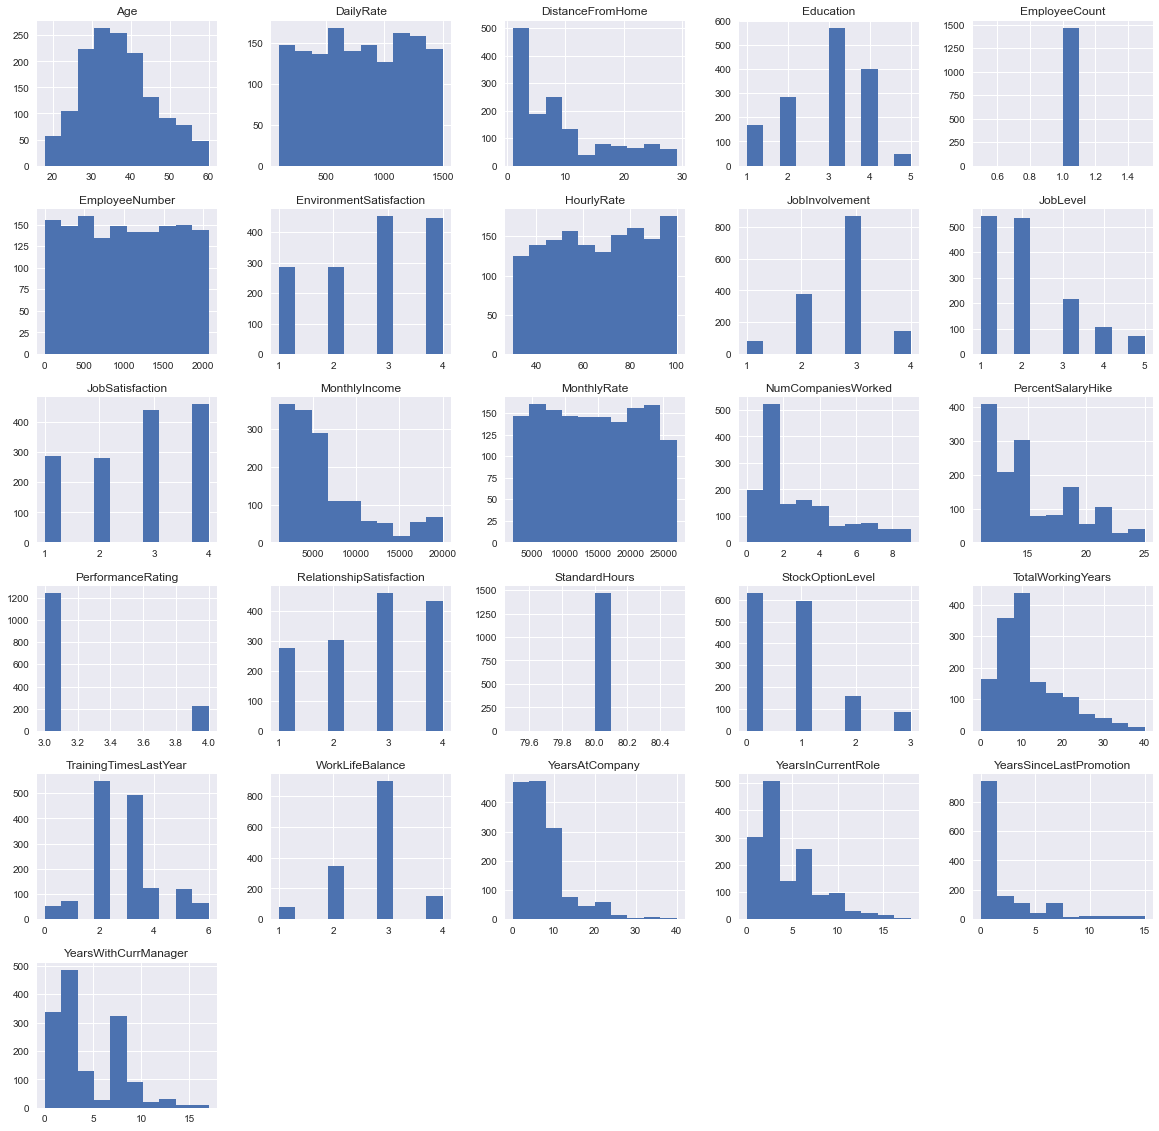

In [19]:
#some stats
df_hr.hist(figsize=(20,20))
plt.show()

In [21]:
#Target Variable: Attrition
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [25]:
# Find correlations with the target and sort
df_HR_trans = df_hr.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


<AxesSubplot:>

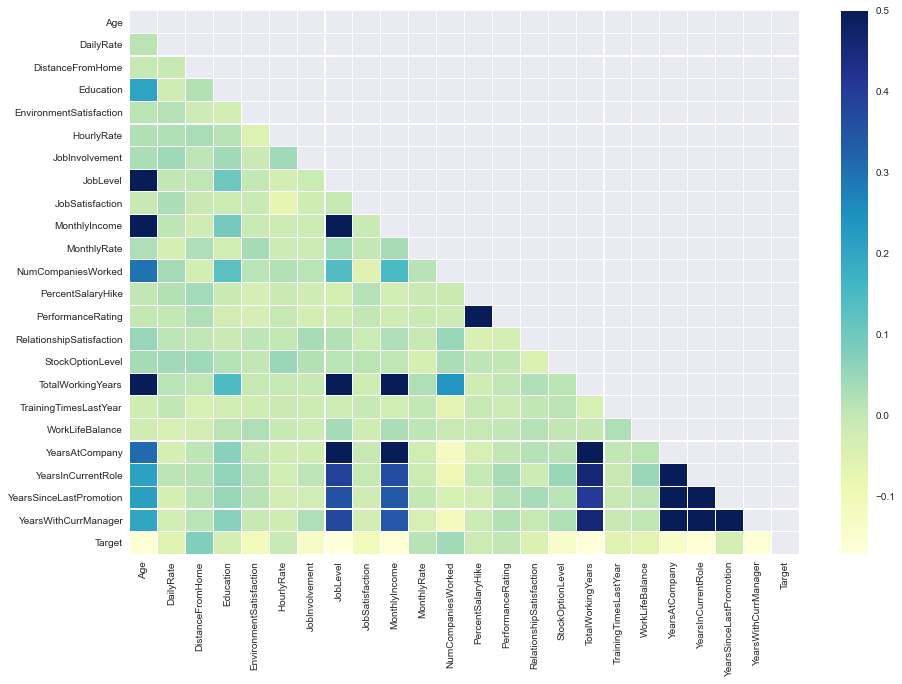

In [30]:
# Calculate correlations
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [40]:
#Pre-processing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_hr.columns[1:]:
    if df_hr[col].dtype == 'object':
        if len(list(df_hr[col].unique())) <= 2:
            le.fit(df_hr[col])
            df_hr[col] = le.transform(df_hr[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [41]:
# convert rest of categorical variable into dummy
df_hr = pd.get_dummies(df_hr, drop_first=True)

In [42]:
#Feature Scaling
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_hr.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_hr[col] = df_hr[col].astype(float)
    df_hr[[col]] = scaler.fit_transform(df_hr[[col]])
df_hr['Attrition'] = pd.to_numeric(df_hr['Attrition'], downcast='float')
df_hr.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [44]:
#Splitting data into training and testing sets
# assign the target to a new dataframe and convert it to a numerical feature
label = df_hr['Attrition'].copy()

In [45]:
# let's remove the target feature and redundant features from the dataset
df_hr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df_hr.shape))

Size of Full dataset is: (1470, 44)


In [46]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_hr,
                                                    label,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=label)  


In [48]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [50]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8623772694860403 0.675497778509133


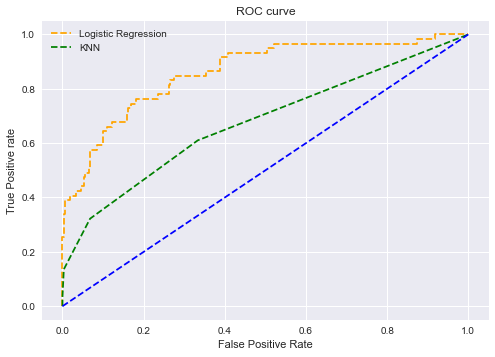

Interpretation
1. Blue dashed line represents the random guessing
2. Yellow dashed line (LR) towards top left represents the better performance than KNN at different threshold and LR is covering 86% area under the curve which means that It will predict classes 86% correctly
3.Green dashed line (KNN) has different AUC value and related ROC curve.KNN is covering 65% area under the curve, which meanss that it will only correctly identified 65% of classes


In [51]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#Interpretation
#blue dashed line represents the random guessing
#Yellow dashed line (LR) towards top left represents the better performance than KNN at different threshold
#LR is performing 86%
#Green dashed line (KNN) has different AUC value and related ROC curve.
#KNN is performing less than 75% may be 65%

print("Interpretation")
print("1. Blue dashed line represents the random guessing")
print("2. Yellow dashed line (LR) towards top left represents the better performance than KNN at different threshold and LR is covering 86% area under the curve which means that It will predict classes 86% correctly")
print("3.Green dashed line (KNN) has different AUC value and related ROC curve.KNN is covering 65% area under the curve, which meanss that it will only correctly identified 65% of classes")

# Liver Patient Classification Problem
Here, our target variable Y is the probability of a patient having liver disease.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
# Read dataset file
df_patient = pd.read_csv('indian_liver_patient.csv')
print("Shape of dataframe is: {}".format(df_patient.shape))

Shape of dataframe is: (583, 11)


In [10]:
# Dataset columns
df_patient.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [11]:
# Dataset header
df_patient.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


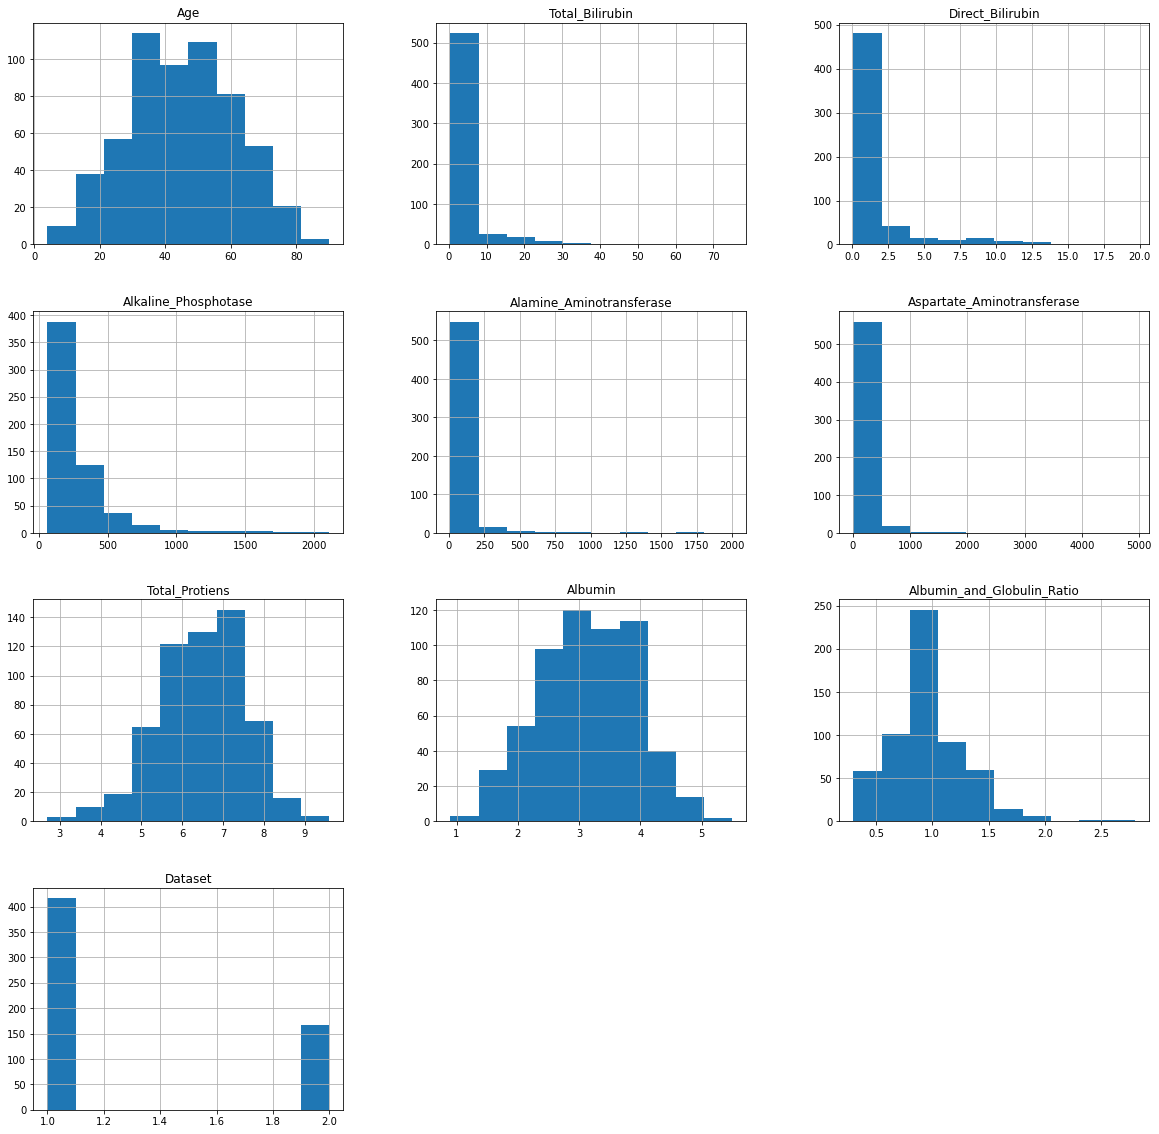

In [13]:
#some stats
# matplotlib
import matplotlib.pyplot as plt
df_patient.hist(figsize=(20,20))
plt.show()

In [14]:
#Target Variable: Dataset
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_patient['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [17]:
#checking null values
print(df_patient.isna().sum())
print("\nThere are 4 Null/Missing values in the dataset\n")

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

There are 4 Null/Missing values in the dataset



In [18]:
#showing null values
df_patient[df_patient['Albumin_and_Globulin_Ratio'].isna()]  

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [54]:
#droping null values
df_patient.dropna(inplace=True)

In [5]:
#checking null counts
df_patient.isna().sum().value_counts()

0    11
dtype: int64

In [55]:
#Removing Duplicate Rows
df_patient.drop_duplicates(inplace=True)

In [7]:
# Find correlations with the target and sort
df = df_patient.copy()
correlations = df.corr()['Dataset'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 Age                          -0.133821
Total_Protiens                0.036443
Albumin                       0.165273
Albumin_and_Globulin_Ratio    0.171402
Dataset                       1.000000
Name: Dataset, dtype: float64

Most Negative Correlations: 
 Direct_Bilirubin             -0.250926
Total_Bilirubin              -0.224467
Alkaline_Phosphotase         -0.186057
Alamine_Aminotransferase     -0.161617
Aspartate_Aminotransferase   -0.151009
Name: Dataset, dtype: float64


<AxesSubplot:>

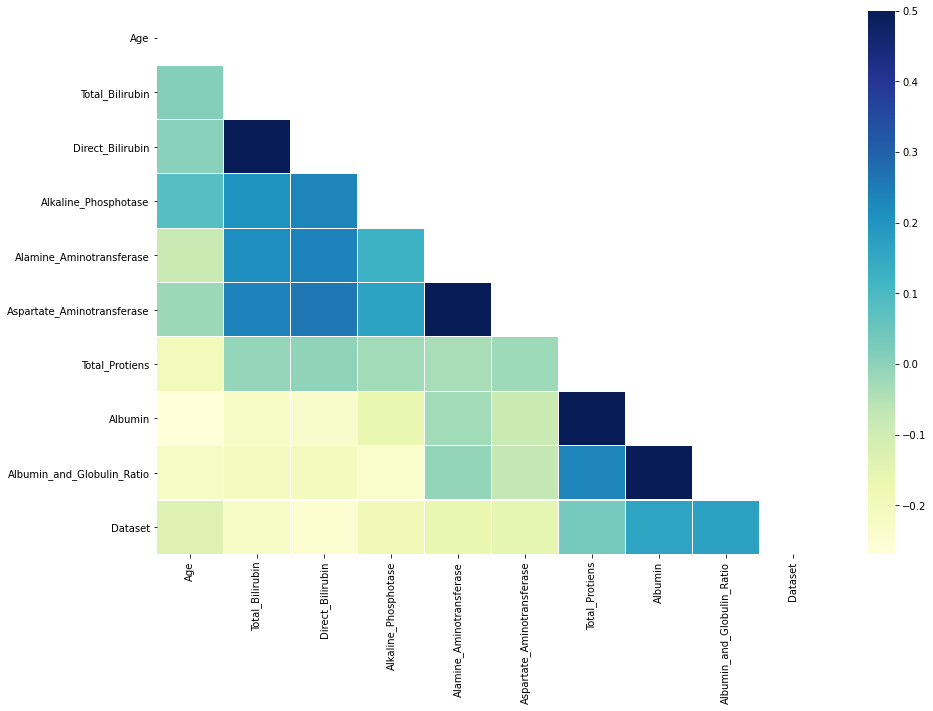

In [28]:
# Calculate correlations
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [56]:
#Splitting data into training and testing sets
# assign the target to a new dataframe and convert it to a numerical feature
label = df['Dataset'].copy()

In [57]:
df['Gender'] = df['Gender'].apply(
    lambda x: 0 if x == 'Male' else 1)

In [58]:
# let's remove the target feature and redundant features from the dataset
df.drop('Dataset',axis=1)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [59]:
# Since we have class imbalance (i.e. more patient with disease)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    label,
                                                    test_size=0.25,
                                                    random_state=10,
                                                    stratify=label)  

In [60]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [62]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

1.0 0.666626418739435


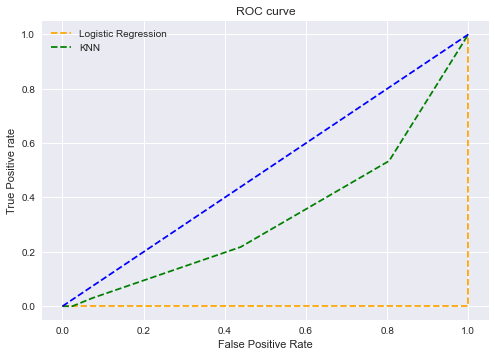

Interpretation
1. Blue dashed line represents the random guessing
2. Yellow dashed line (LR) towards bottom right represents the worst performance of model, where it will predict the 0 class as 1 and 1 as 0. Its mixing postive with negative. Area under the curve is 1
3.Green dashed line (KNN) is also performing worst as it is also below the 50% chances. In KNN the area under the curve is 0.66


In [63]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#Interpretation
#blue dashed line represents the random guessing
#Yellow dashed line (LR) towards bottom right represents the worst performance of model, where it will predict the 0 class as 1
#and 1 as 0
#LR is Its mixing postive with negative. Area under the curve is 1
#Green dashed line (KNN) is also performing worst as it is also below the 50% chances.
#In KNN the area under the curve is 0.66

print("Interpretation")
print("1. Blue dashed line represents the random guessing")
print("2. Yellow dashed line (LR) towards bottom right represents the worst performance of model, where it will predict the 0 class as 1 and 1 as 0. Its mixing postive with negative. Area under the curve is 1")
print("3.Green dashed line (KNN) is also performing worst as it is also below the 50% chances. In KNN the area under the curve is 0.66")